In [ ]:


!pip install -q dlib==19.18.0 -vv
!pip install -q face-recognition-models==0.3.0
!pip install -q face_recognition==1.3.0


import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt









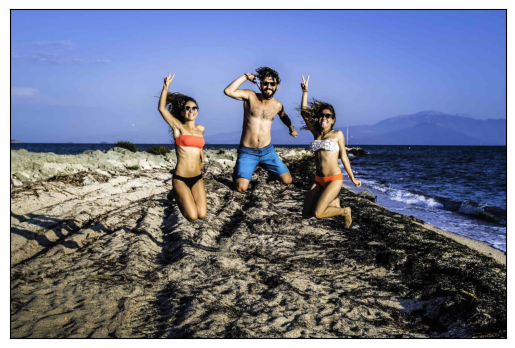

In [2]:
file_name = "/content/CV_Zachet_8.jpg"


image = face_recognition.load_image_file("/content/CV_Zachet_8.jpg")
plt.imshow(image) # Обработка данных на изображении image
plt.xticks([])
plt.yticks([])
plt.show()

Координаты лица (в пикселях) Верхний: 426, Левый: 778, Нижний: 488, Правый: 840


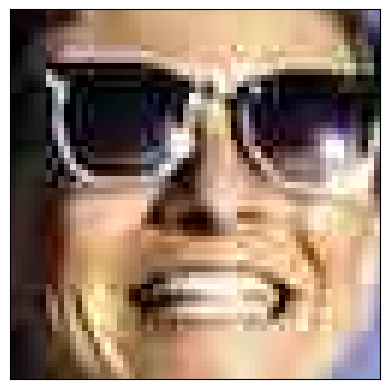

Координаты лица (в пикселях) Верхний: 453, Левый: 1373, Нижний: 528, Правый: 1448


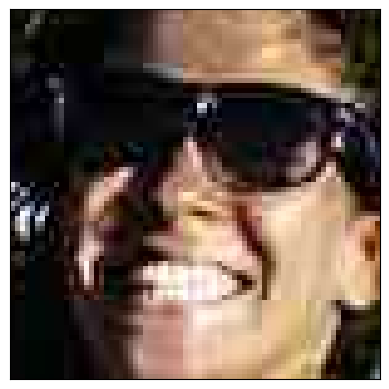

Координаты лица (в пикселях) Верхний: 312, Левый: 1124, Нижний: 387, Правый: 1199


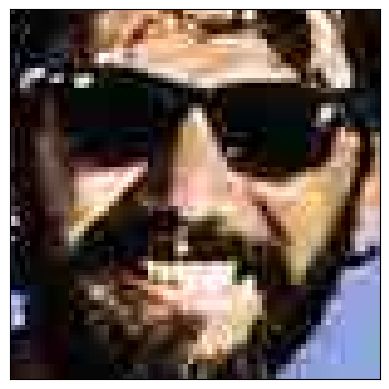

In [3]:
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:

    # Выводим координаты каждого лица на изображении
    top, right, bottom, left = face_location
    print("Координаты лица (в пикселях) Верхний: {}, Левый: {}, Нижний: {}, Правый: {}".format(top, left, bottom, right))
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    plt.imshow(pil_image) # Обработка данных на изображении image
    plt.xticks([])
    plt.yticks([])
    plt.show()

# если распознано 4 прямоугольника но один из них не человек а просто херня какая то
# вводите 3, если не сработает то 4


In [13]:
face_landmarks_list = face_recognition.face_landmarks(image)

pil_image = Image.fromarray(image)




from PIL import Image, ImageDraw

max_lips_pixels = 0

for face_landmarks in face_landmarks_list:
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image)
    d.rectangle([(0,0),pil_image.size], fill = (0,0,0))
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0), width=4)
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0), width=4)

    c = 0


    for pixel in pil_image.getdata():
      if (pixel != (0, 0, 0)):
        c += 1

    max_lips_pixels = max(max_lips_pixels, c)

print("Количество пикселей, из которых состоят самые большие губы на изображении:", max_lips_pixels)


Количество пикселей, из которых состоят самые большие губы на изображении: 205


In [11]:
pil_image = Image.fromarray(image)

ans = 0

for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGB')
    d.rectangle([(0,0),pil_image.size], fill = (0,0,0) )
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0), width=4)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0), width=4)

    c = 0

    for pixel in pil_image.getdata():
      if (pixel != (0, 0, 0)):
        c += 1

    ans = max(ans, c)

print(ans)

383
